## Data Analysis on Netflix Movie Data and Sitcom "The Office

In this project, we have studied data from popular sitcom "The Office" and have analyzed the popularity of the show and appearance of guest stars over the sitcom's episodes. The data analyzed is taken from Kaggle and can be accessed from [here](https://www.kaggle.com/nehaprabhavalkar/the-office-dataset).

## Loading data from CSV File

In [74]:
import pandas as pd
url="https://raw.githubusercontent.com/sadafaleem/data_science_projects/main/Investigating%20Netflix%20Movies%20and%20Guest%20Stars%20in%20The%20Office%20Unguided/datasets/office_episodes.csv"
office_data=pd.read_csv(url)
office_data.head()


,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


## Getting insght into data

In [76]:
office_data.shape

(188, 14)

The dataset contains 188 observations and 14 columns.

In [77]:
office_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


We can observe that guest_stars column has missing values.
For our analysis, we will use selected columns that are required for our analysis only.

In [78]:
office_data.nunique()

episode_number    188
season              9
episode_title     188
description       188
ratings            30
votes             178
viewership_mil    149
duration           13
release_date      184
guest_stars        28
director           54
writers            47
has_guests          2
scaled_ratings     30
dtype: int64

## Creating Plots to Study Trends in Data

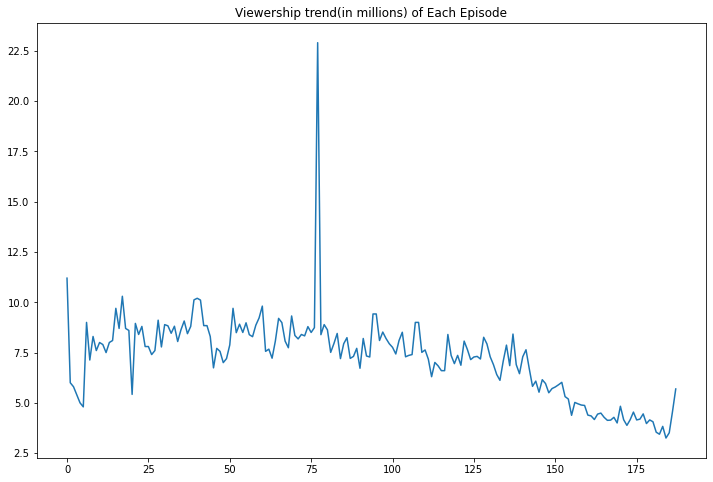

In [79]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))

# Draw a line plot of episode number and viewership in millions
plt.plot(office_data["episode_number"],office_data["viewership_mil"])

# Create a title
plt.title("Viewership trend(in millions) of Each Episode")

# Show the plot
plt.show()

In [80]:
#Assigning color based on ratings
color_scheme=[]

#Assigning color based on ratings

for ind,row in office_data.iterrows():
    if row["scaled_ratings"]<0.25:
        color_scheme.append("red")
    elif (row["scaled_ratings"]>= 0.25 and row["scaled_ratings"]<0.5):
        color_scheme.append("orange")
    elif (row["scaled_ratings"]>=0.5 and row["scaled_ratings"]<0.75):
        color_scheme.append("lightgreen")
    else:
        color_scheme.append("darkgreen")


print(color_scheme)


['orange', 'lightgreen', 'orange', 'orange', 'lightgreen', 'orange', 'lightgreen', 'orange', 'lightgreen', 'lightgreen', 'orange', 'orange', 'lightgreen', 'orange', 'lightgreen', 'lightgreen', 'lightgreen', 'darkgreen', 'lightgreen', 'orange', 'orange', 'lightgreen', 'lightgreen', 'lightgreen', 'orange', 'lightgreen', 'lightgreen', 'darkgreen', 'darkgreen', 'orange', 'lightgreen', 'orange', 'orange', 'orange', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'orange', 'orange', 'lightgreen', 'lightgreen', 'darkgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'darkgreen', 'darkgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'orange', 'lightgreen', 'darkgreen', 'orange', 'lightgreen', 'lightgreen', 'orange', 'darkgreen', 'lightgreen', 'lightgreen', 'orange', 'orange', 'orange', 'lightgreen', 'orange', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'orange', 'darkgreen', 'orange', 'orang

In [81]:
office_data['colors'] = color_scheme


In [82]:
office_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
 14  colors          188 non-null    object 
dtypes: bool(1), float64(3), int64(4), object(7)
memory usage: 20.9+ KB


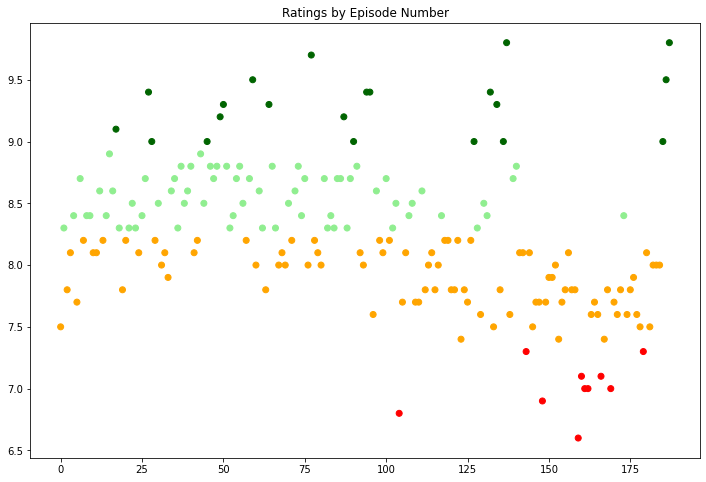

In [83]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of episode number and its ratings
plt.scatter(office_data["episode_number"], office_data["ratings"], c=office_data.colors)

# Create a title
plt.title("Ratings by Episode Number")

# Show the plot
plt.show()

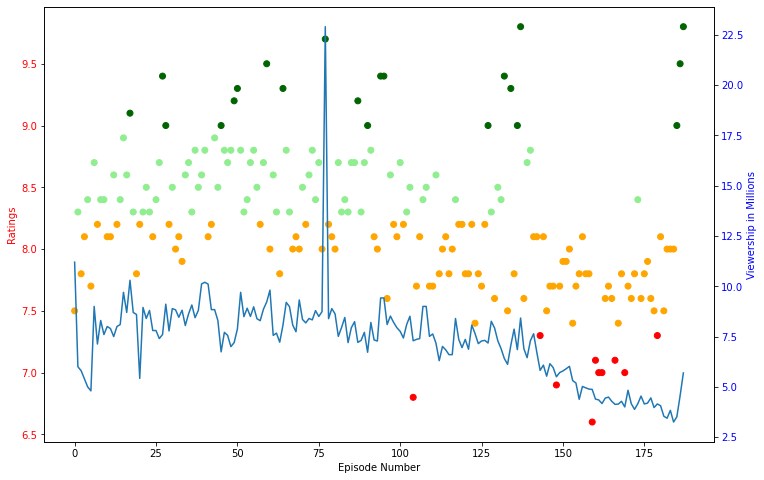

In [84]:
fig, ax1 = plt.subplots(figsize=(12,8))


ax1.set_xlabel('Episode Number')
ax1.set_ylabel('Ratings', color='red')
ax1.scatter(office_data["episode_number"], office_data["ratings"], c=office_data.colors)
ax1.tick_params(axis='y', labelcolor='red')

ax2=ax1.twinx() 

color = 'tab:blue'

ax2.set_ylabel('Viewership in Millions', color='blue')
ax2.plot(office_data["episode_number"],office_data["viewership_mil"])
ax2.tick_params(axis='y', labelcolor='blue')

plt.show()

We can observe that overall viewership of the show has declined.

We want to find out who was the guest star in the episode that got the most viewership. To do so, we will subset our data.

In [86]:
top_guest_stars=office_data[office_data["viewership_mil"]>20]
print(top_guest_stars[["episode_number", "guest_stars", "season"]])

    episode_number                                guest_stars  season
77              77  Cloris Leachman, Jack Black, Jessica Alba       5


In [87]:
print(top_guest_stars["guest_stars"])

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object
